In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_normal = pd.read_csv('../datasets/topics_processed.csv')
df_normal.head()

,name,sent_mean,sent_mean_discrete,support_left,support_right,con_pos,con_neg,controversy,controversy_discrete,mass,entropy
0,"['czech', 'ukraine', 'russian', 'putin']",0.122660,0.373824,-0.382212,0.545048,0.309310,0.348462,0.927260,0.860255,825.734037,0.896706
1,"['babi', 'vote', 'election', 'president']",0.119969,0.368194,-0.380698,0.538185,0.290192,0.350303,0.918883,0.864433,791.127474,0.899870
2,"['doctor', 'hospital', 'life', 'patient']",0.108040,0.345917,-0.423464,0.529945,0.250133,0.433210,0.953409,0.880341,439.059011,0.911875
3,"['tax', 'inflation', 'pay', 'money']",0.115981,0.384612,-0.351740,0.509463,0.223367,0.311506,0.861203,0.852073,457.750070,0.890493
4,"['book', 'time', 'read', 'understand']",0.105808,0.322740,-0.421523,0.543704,0.273631,0.433836,0.965227,0.895839,387.294894,0.923502


In [3]:
df_weighted_linear = pd.read_csv('../datasets/topics_processed_linear.csv')
df_weighted_linear.head()

,name,sent_mean,sent_mean_discrete,support_left,support_right,con_pos,con_neg,controversy,controversy_discrete,mass,entropy
0,"['czech', 'ukraine', 'russian', 'putin']",0.114677,0.347359,-0.493625,0.576873,0.379725,0.490859,1.070498,0.879342,825.734037,0.911123
1,"['babi', 'vote', 'election', 'president']",0.113783,0.366262,-0.438540,0.532701,0.320338,0.439652,0.971241,0.865852,791.127474,0.900944
2,"['doctor', 'hospital', 'life', 'patient']",0.079374,0.280335,-0.486687,0.498801,0.229799,0.521399,0.985488,0.921412,439.059011,0.942544
3,"['tax', 'inflation', 'pay', 'money']",0.103977,0.384266,-0.407009,0.514643,0.283001,0.418865,0.921652,0.852340,457.750070,0.890696
4,"['book', 'time', 'read', 'understand']",0.083403,0.286957,-0.526689,0.538830,0.289756,0.553623,1.065519,0.917656,387.294894,0.939758


In [4]:
df_weighted_sqrt = pd.read_csv('../datasets/topics_processed_sqrt.csv')
df_weighted_sqrt.head()

,name,sent_mean,sent_mean_discrete,support_left,support_right,con_pos,con_neg,controversy,controversy_discrete,mass,entropy
0,"['czech', 'ostrava', 'ukraine', 'russian']",0.116722,0.375729,-0.404277,0.533349,0.283841,0.395175,0.937626,0.858828,717.549991,0.895623
1,"['game', 'player', 'team', 'bank']",0.141426,0.418028,-0.356992,0.597430,0.449910,0.290169,0.954422,0.825253,407.547305,0.869992
2,"['babi', 'vote', 'election', 'president']",0.128288,0.399258,-0.373284,0.541990,0.322169,0.333331,0.915274,0.840593,664.340933,0.881744
3,"['inflation', 'tax', 'pay', 'money']",0.115469,0.380850,-0.374360,0.527787,0.270729,0.353744,0.902146,0.854953,578.834281,0.892682
4,"['life', 'mom', 'feel', 'like']",0.125047,0.385489,-0.391611,0.555889,0.342421,0.364748,0.947500,0.851398,397.235822,0.889980


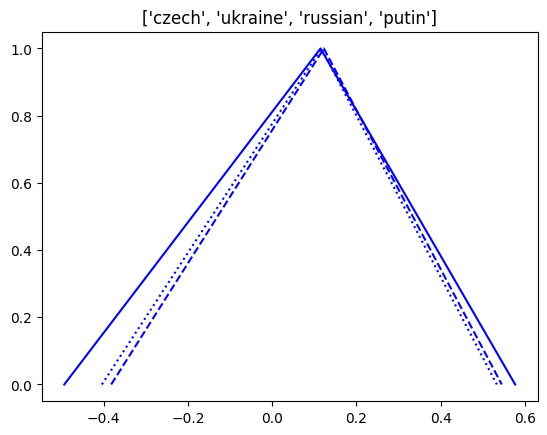

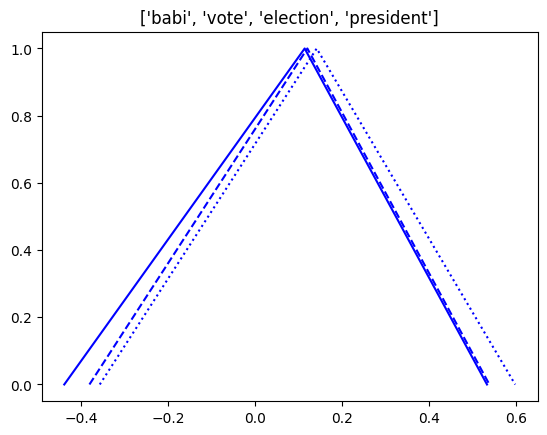

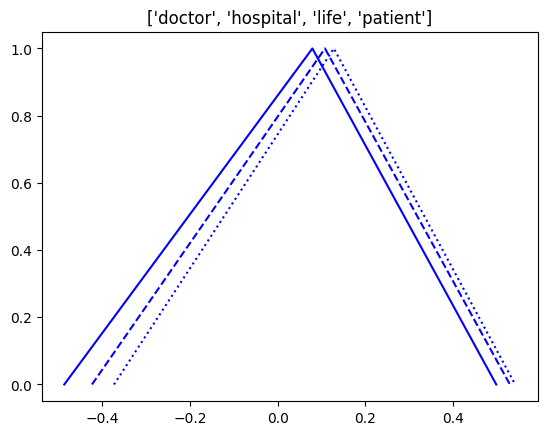

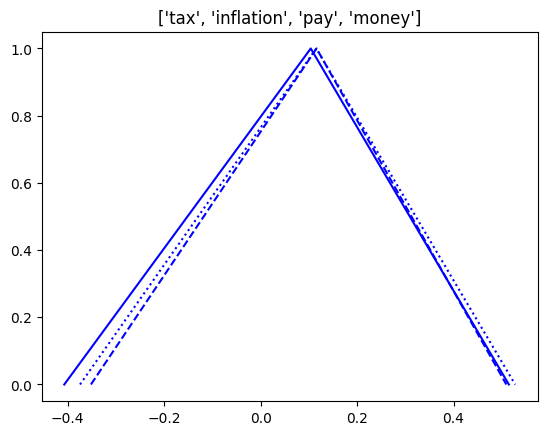

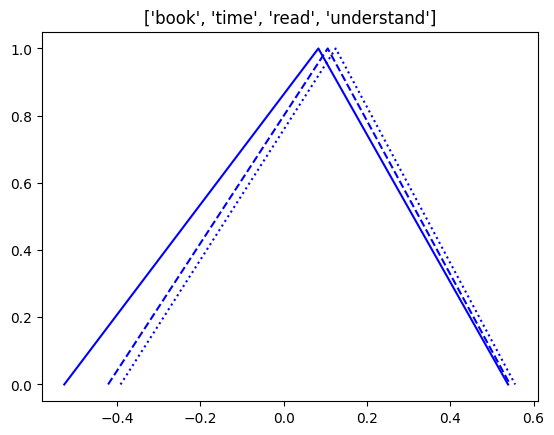

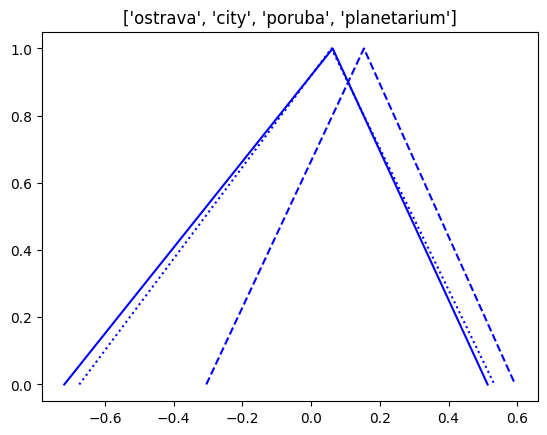

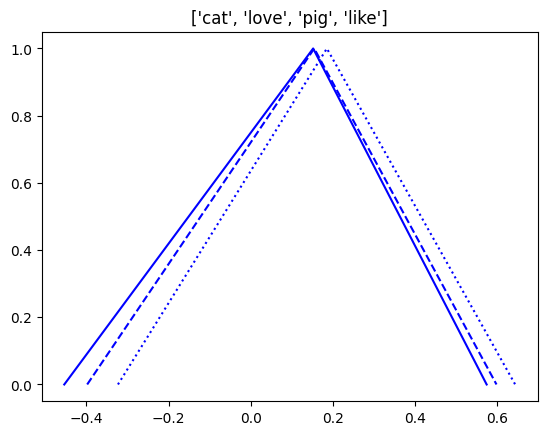

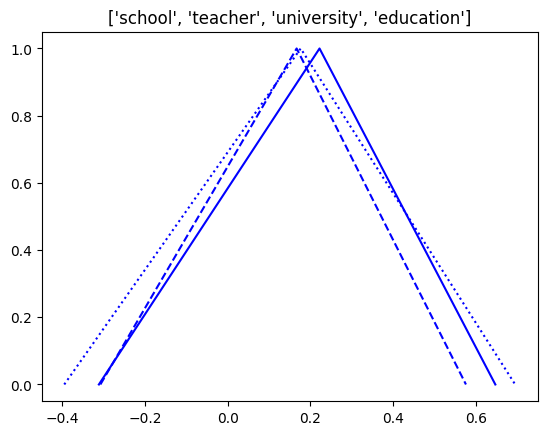

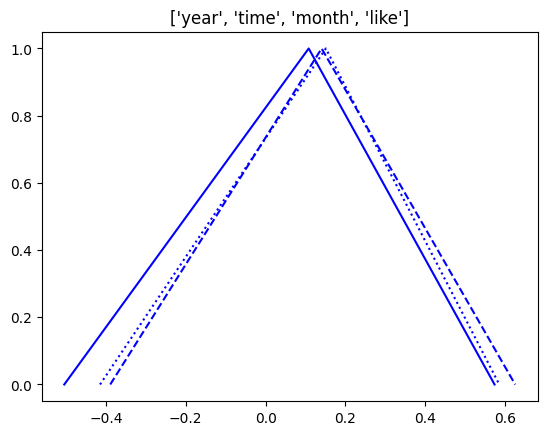

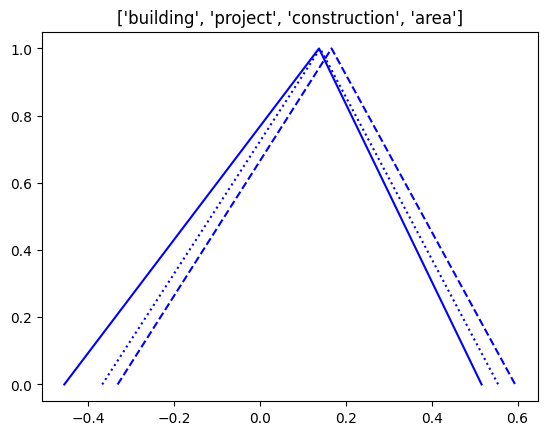

In [7]:

colors = ['red', 'blue', 'green', 'yellow', 'brown']

for i in range(10):
    row_normal = df_normal.loc[i]
    row_weighted_linear = df_weighted_linear.loc[i]
    row_weighted_sqrt = df_weighted_sqrt.loc[i]
    plt.title(row_normal['name'])
    plt.plot([row_normal['support_left'], row_normal['sent_mean'], row_normal['support_right']], [0, 1, 0], linestyle='dashed', color='blue')
    plt.plot([row_weighted_linear['support_left'], row_weighted_linear['sent_mean'], row_weighted_linear['support_right']], [0, 1, 0], color='blue')
    plt.plot([row_weighted_sqrt['support_left'], row_weighted_sqrt['sent_mean'], row_weighted_sqrt['support_right']], [0, 1, 0], color='blue', linestyle='dotted')
    plt.show()